# MTH9879 Homework 2

Assigned: February 16, 2016.
Due: March 1, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) and Jim Gatheral (jim.gatheral@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact Yuxi Liu, who has kindly offered to help.


### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

Drom notes, it makes no sense to place limit order at t=3 

The probability for market sell and buy orders are both are:

$P_{mb3}=5/22$

$P_{ms3}=5/22$

For the same reason, it onlu makes sense to put limit order at time 2 if the queue is empty, thus the probability of market order at time 2 given that that the queue is not empty is same as t=3:

$P_{mb2_c}=5/22$ (conditional prob of market buy at time 2 when the queue is not empty)

$P_{ms2_c}=5/22$ (conditional prob of market sell at time 2 when the queue is not empty)

Note that, at time 1, the limit order will be executed if and only if two market orders come at time 2 and time3

Thus, solve the following utility equation:

$B-\beta_{1}=(A-\beta_{1})=(A-\beta_{1}\times V ) \times P_{mb2_c} \times P_{mb3}$

$B-\beta_{2}=0$

The probability of a limit sell order can be determined as:

$Prob_{ms}=\frac{F(\beta_{1})}{2} = \frac{22}{459} $

$Prob_{ls}=\frac{F(\beta_{2})-F(\beta_{1})}{2} = \frac{1135}{5049} $

where F(.) is the cumulative distribution function of uniform distribution over [0,2]

Follow the exactly same argument, we can compute the probability of market buy and limit buy at time 1

$Prob_{mb}= \frac{22}{459} $

$Prob_{lb}= \frac{1135}{5049} $

### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

In Parlour's model, all limit order can be place at either the best bid or the best ask, which implies that the longer the existing queue is, the less likely the limit order book will be filled, which will further reduce the probability taht next agent from the same side will place a limit order. The impact of size of queue on the other side is bit more subtle. As discussed, as the queue grows, the probability of another limit order will decrease and a market order will increase, and a market order will reduce the queue size on the other side, which makes an arival of limit order on the other side to be more possible. 

### Download R-code

In [21]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

In [1]:
#a
sigma=0.01
px=37.5
T=0.01
lamda_u=px*sigma*sqrt(T)*100#times 100 to convert to cents
lamda_u

[1] 3.75

In [2]:
#b
s=1
h=s/2
f_BZX=0.3
r_BZX=0.32
f_BYX=-0.03
r_BYX=-0.03

h is 0.5

f of BZX is 0.3

r of BZX is 0.32

f of BYX is -0.03

r of BYX is -0.03

In [4]:
#c
xi_BZX=10500000*0.01
xi_BYX=1300000*0.01

The $\bar \xi$ for BZX is 10500000 $\times$ 0.01 = 105000 

The $\bar \xi$ for BYX is 1300000 $\times$ 0.01 = 13000 

In [5]:
#d

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

$$
var(\xi) = \bar \xi ^2 ( exp(\sigma^2)-1)exp(-0.5\times 2 \sigma^2 + \sigma ^2)
= \bar \xi ^2 ( exp(\sigma^2)-1)
$$

Note that \sigma=0.5 in this case

standard deviation of $\xi$ is $\bar \xi(exp(0.25)-1)^2$

In [6]:
#e
L <- function(h,r,f,xi,sigma,lambdaU) {
  fql <- (2*h+f+r)/(lambdaU+h+r)
  return(qlnorm(fql,meanlog=-1/2*sigma*sigma+log(xi),sdlog=sigma))
}

L_bzx <- L(h,r_BZX,f_BZX,xi_BZX,1/2,lamda_u)
L_byx <- L(h,r_BYX,f_BYX,xi_BYX,1/2,lamda_u)

In [7]:
#L+Q for bzx is:
L_bzx

[1] 76887.36

In [8]:
#L+Q for byx is:
L_byx

[1] 7834.038

In [14]:
#f
#the ratio of optimal BZX limit order size to the volume is 
L_bzx/10500000

[1] 0.007322606

In [15]:
#the BZX ratio observed was
mean(c(1700,1558,1300,1100,700,800,900,900,1258,1900))/1078386

[1] 0.001123531

In [16]:
#the ratio of optimal BYX limit order size to the volume is 
L_byx/1300000

[1] 0.006026183

In [18]:
#the BYX ratio observed was
mean(c(100,100,100,200,200,100,400,400,200,200))/310861

[1] 0.0006433744

The ratios don't match very well. In the case of BYX, the estimated ratio is almost 10 times the observed ratio

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

In [22]:
#a
#add a counter to the limit and buy order function
num_BL<<- 0#initialized to 0
limitBuyOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestOffer()-pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,]<<- c("LB",prx)} 
  book$buySize[book$Price==prx]<<-book$buySize[book$Price==prx]+1
  num_BL<<- num_BL+1} 

num_SL<<- 0#initialized to 0
limitSellOrder <- function(price=NA){
  if (is.na(price))
  {prx <<- (bestBid()+pick(L))}
  else prx <<-price  
  if(logging==T){eventLog[count,] <<- c("LS",prx)}
  book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1
  num_SL<<- num_SL+1} 

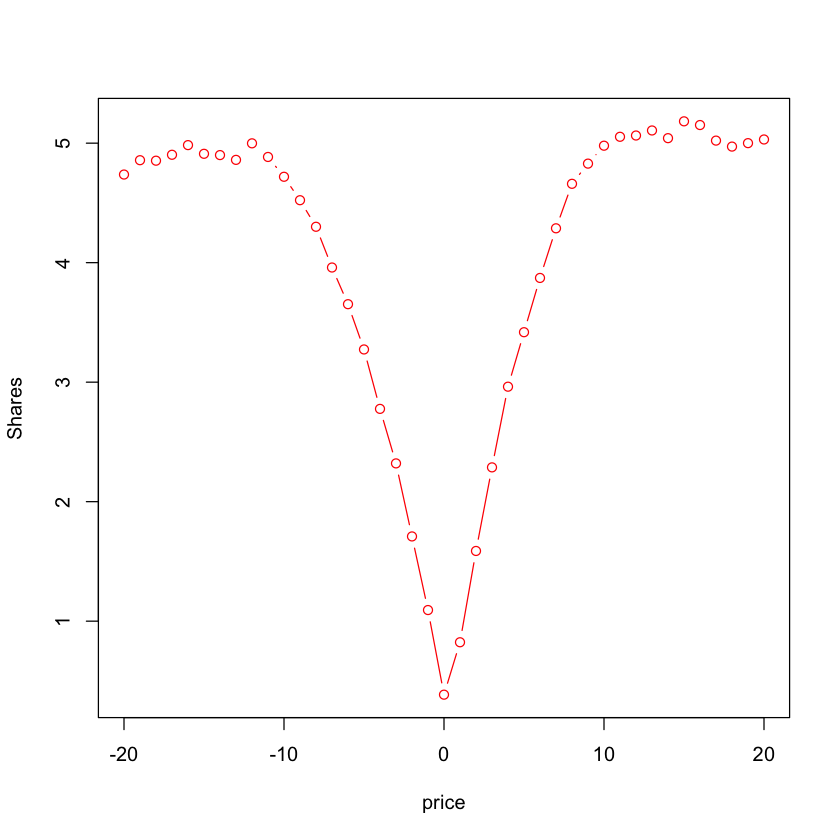

In [23]:
#b
alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()
for(count in 1:100){
  generateEvent()
}
num_BL=0
num_SL=0
numEvents <- 100000 
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}
plot(-20:20,avgBookShape,xlab="price",ylab="Shares", col="red", type="b")

In [24]:
#c
#probability is:
Prob_L=(num_BL+num_SL) / numEvents / (L * 2)
Prob_L

[1] 0.008332333

In [55]:
#d
Var_GO = 0.083
PL_best = Prob_L * 2 
Var_GO_adjust = Var_GO/(PL_best)
delta_GO = sqrt(Var_GO_adjust/(2*delta))
Var_GO_adjust
delta_GO

[1] 4.978307

[1] 3.527856

$\sigma^2_{GO}$ is 4.97830737549233

$\Delta_{GO}$ is 3.52785606831271

In [57]:
#e
Var_DA = (mu*delta) / (alpha*alpha)
delta_DA = sqrt(Var_DA/(2*delta))
Var_DA
delta_DA

[1] 2

[1] 2.236068

$\sigma^2_{DA}$ is 2

$\Delta_{DA}$ is 2.23606797749979

In [58]:
#f
Density_BMP <- function(d,CDistance) { alpha/delta*(1-exp(-abs(d)/CDistance)) }

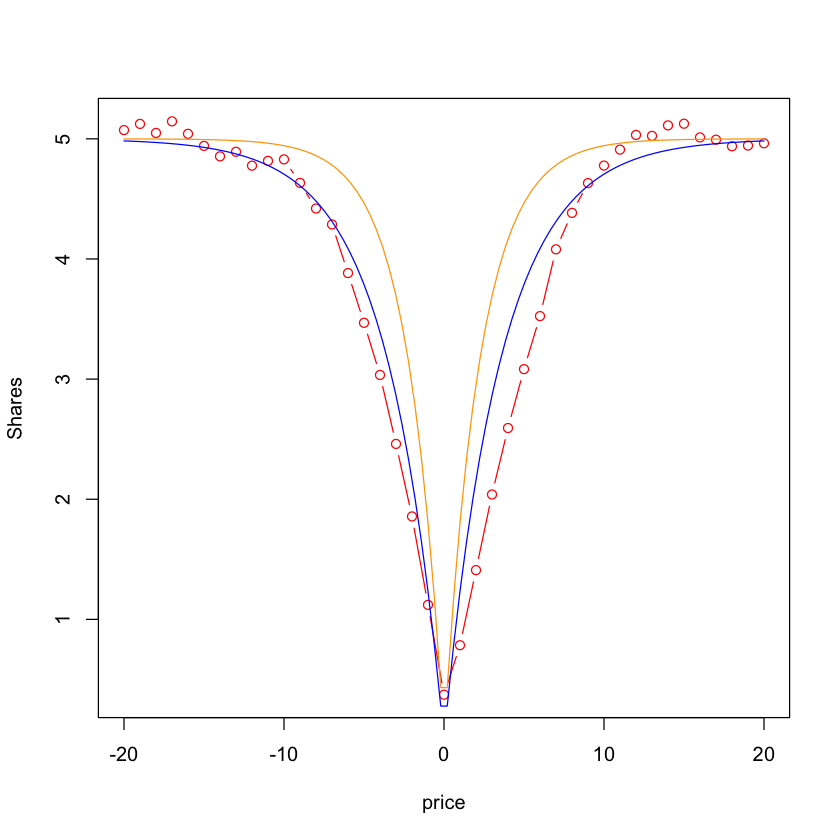

In [64]:
#g
plot(-20:20,avgBookShape,xlab="price",ylab="Shares", col="red", type="b")
curve(Density_BMP(x,delta_GO),from=-20,to=20,n=100,col="blue",add=TRUE)
curve(Density_BMP(x,delta_DA),from=-20,to=20,n=100,col="orange",add=TRUE)

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

(a)

Denote the cumulative distribution function of t distribution with 0.5 dof as $F(x)$. Because of symmetry, we can only consider sell order. The probability of a sell order being non marketable is F(h), where h is half of the spread s. The probability of a sell order being marketable is 1-F(h). Thus, the ration of limit order to marketable order is:

$\frac{F(h)}{1-F(h)}$

Note than F is a strictly increasing function, implying that the ratio is strictly increasing with respect to s

(b)

The above result suggest that when spread is small, there will be more market order arriving, which will make the spread larger, and vice versa. Note that the order in a zi model does not depend on the magnitude of spread, the observed strategic behavior will make the spread revert faster.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>